In [108]:
import numpy as np
import math as m
from matplotlib import pyplot as plt 
from matplotlib import cm

In [109]:
def func(x):
#     return math.cos(x[0]) * math.sin(x[1])
    return -(x[1] + 47)*m.sin(m.sqrt(abs(x[0]/2 +(x[1] + 47)))) - x[0]*m.sin(m.sqrt(abs(x[0] - (x[1] + 47))))

In [110]:
def grad(x, step = 0.00001):
    arr = np.empty([x.size])
    for i in range(0, x.size):
        x2 = np.copy(x)
        x2[i] += step
        arr[i] = (func(x2) - func(x)) / step
    return arr

def vect_length(arr):
    res = 0
    for i in range(0, arr.size):
        res += arr[i]**2
    return res**0.5

In [111]:
def alg(xk, tk):
    all_points = [[], [], []]
    all_points[0].append(xk.tolist()[0])
    all_points[1].append(xk.tolist()[1])
    all_points[2].append(func(xk))
    while True:
        new_xk = subtract_vectors(xk, scalar_multiply(tk, grad(xk)))
        
        
        all_points[0].append(new_xk.tolist()[0])
        all_points[1].append(new_xk.tolist()[1])
        all_points[2].append(func(new_xk))
        
        if vect_length(subtract_vectors(new_xk, xk)) < 0.00001:
            print(new_xk, func(new_xk))
            break
        if func(new_xk) - func(xk) < 0:
            tk /= 2
        xk = new_xk
    return all_points

In [112]:
def subtract_vectors(v, w):
    return np.array([vi - wi for vi, wi in zip(v, w)])

def scalar_multiply(c, v):
    return np.array([c * vi for vi in v])

[ 94.89156012 108.69917162] -249.4002373527045


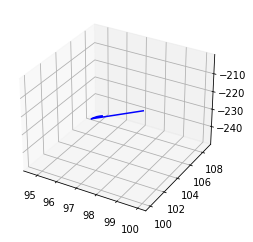

In [113]:
# def fun(x, y):
#     return func(np.array([x, y]))

x0 = np.array([100.,100.])
tk = 1
points = alg(x0, tk)

# X, Y = np.meshgrid(points[0], points[1])

ax = plt.axes(projection = '3d')

# ax.plot_surface(X, Y, fun(X, Y), cmap=cm.hot)

# plt.show()
ax.plot3D(points[0], points[1], points[2], 'blue')
